In [1]:
import pickle

training_file = './data/train.p'
validation_file= './data/valid.p'
testing_file = './data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from scipy.misc import imread, imresize
import cv2
from keras.preprocessing import image

Using TensorFlow backend.


In [54]:
# some of the images looks more blurry than the others-- potentially histogram equalisation can help with this
def histogramEqualisation(img):
    original_type = img.dtype
    if img.dtype != 'uint8':
        img = img.astype('uint8')
    img_yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    equalised = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
    return equalised.astype(original_type)

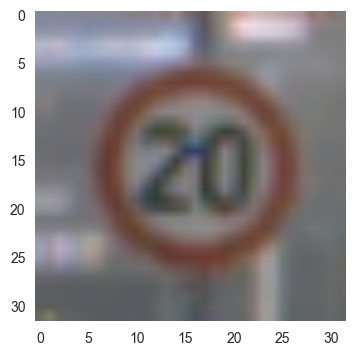

In [8]:
ax = plt.subplot(1,1,1)
ax.grid(False)
ax.imshow(X_train[10000])

(32, 32, 3)
(32, 32)


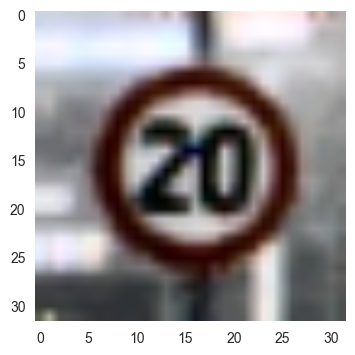

In [33]:
equalised_img = histogramEqualisation(X_train[10000])
ax = plt.subplot(1,1,1)
ax.grid(False)
ax.imshow(equalised_img)

In [10]:
img_yuv.shape

(32, 32, 3)

In [11]:
img_yuv[:,:,0]

array([[137, 137, 137, ..., 134, 120, 126],
       [138, 142, 141, ..., 132, 131, 129],
       [155, 154, 156, ..., 126, 127, 127],
       ..., 
       [ 94,  94,  95, ..., 103, 105, 101],
       [ 93,  93,  93, ..., 101, 104, 100],
       [103, 124, 100, ..., 100, 104, 100]], dtype=uint8)

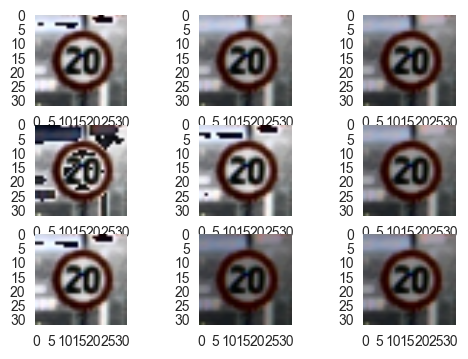

In [19]:
# brightness augmentation
for i in range(9):
    img = np.copy(img_yuv) 
    img[:,:,0] = cv2.equalizeHist(img[:,:,0])
    img[:,:,0] = (0.5 + np.random.uniform()) * img[:,:,0]
    img[:,:,0][img[:,:,0] > 255] = np.random.uniform() * 255
    
    ax = plt.subplot(3,3,i+1)
    ax.grid(False)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_YUV2RGB))
    
    

In [80]:
datagenerator = image.ImageDataGenerator(
    featurewise_center=True,
    samplewise_center=True,
    featurewise_std_normalization=True,
    samplewise_std_normalization=True,
    rotation_range=30.,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=2.,
    zoom_range=0.3,
    rescale = 1./255,
    fill_mode='nearest',
    horizontal_flip=False,
    vertical_flip=False,
    preprocessing_function=histogramEqualisation
)


datagen = image.ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')

In [81]:
datagenerator.fit(X_train)

In [87]:
x = np.copy(X_train[10000])
y = np.copy(y_train[10000])
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
y = y.reshape((1,1))

print(x.shape, y.shape, y)
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagenerator.flow(x, y, batch_size=1, save_to_dir='preview', save_prefix='sign', save_format='jpeg'):
    if i==0:
        print(batch)
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

(1, 32, 32, 3) (1, 1) [[0]]
(array([[[[-1.14352739, -1.08401608, -1.08712268],
         [-1.14393806, -1.08423114, -1.0888114 ],
         [-1.14414346, -1.08509076, -1.08944452],
         ..., 
         [-1.13962471, -1.08659518, -1.09408844],
         [-1.15133262, -1.09648204, -1.10316515],
         [-1.14784074, -1.09153855, -1.09725475]],

        [[-1.14208949, -1.08272648, -1.08332312],
         [-1.1427058 , -1.08337128, -1.08395648],
         [-1.14414346, -1.08509076, -1.08944452],
         ..., 
         [-1.13962471, -1.08659518, -1.09408844],
         [-1.15133262, -1.09648204, -1.10316515],
         [-1.14784074, -1.09153855, -1.09725475]],

        [[-1.13633823, -1.07606363, -1.07889044],
         [-1.14003539, -1.07993245, -1.08036792],
         [-1.14147329, -1.08036232, -1.0812124 ],
         ..., 
         [-1.13962471, -1.08659518, -1.09408844],
         [-1.15133262, -1.09648204, -1.10316515],
         [-1.14784074, -1.09153855, -1.09725475]],

        ..., 
      

In [45]:
X_train[10000].dtype

dtype('uint8')